In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])

## Why we need feature scaling

**Feature scaling is a method used to normalize the range of independent variables or features of data.**

- The goal is to make sure that all features are on a similar scale/range (for example: -1 <= x <= 1)
- Changes the range of the feature

**WHY**:
- Since the **range of values** of raw data varies widely, objective functions will not work properly without normalization
- For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. **Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance**
- Another reason is that **gradient descent converges much faster**
- Important so that one significant feature does not impact the model just because of their large magnitude
- Features with higher order of magnitude will start to  play a more decisive role while training the model.


**By scaling your variables, you can help compare different variables on equal footing.**

**Example**

A machine learning algorithm works on numbers and does not know what a number represents. A weight of 10 grams and a price of 10 dollars represent completely two different things for a humam but for a model as a feature, it treats both as same

In the table (dataframe) below, the “Weight” cannot have a meaningful comparison with the “Price.” So the assumption algorithm makes that since “Weight” > “Price,” thus “Weight,” is more important than “Price.”


In [2]:
df

,WEIGHT,PRICE
Orange,15,1
Apple,18,3
Banana,12,2
Grape,10,5


##### Converges much faster
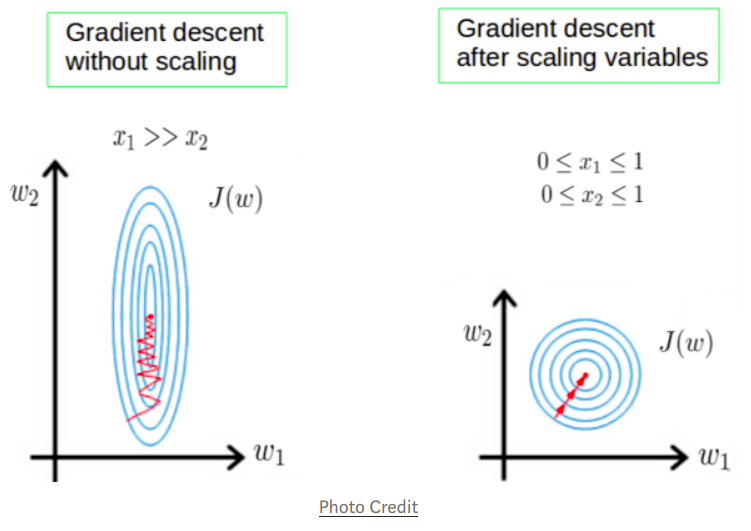

## When to do scaling?

1. Feature scaling is essential for machine learning algorithms that **calculate distances between data**. If not scale, the feature with a higher value range starts dominating when calculating distances
2. **Is a must for Neural networks** - we want faster convergence

**Rule of thumb we may follow here is an algorithm that computes distance or assumes normality, scale your features.**

Examples of algorithms:
- KNN (with euclidean distance measure)
- K-means
- PCA - scaling is critical while performing PCA
- When we want to speed up gradient descent
- Linear regression
- Logistic Regression
- NN
- Algorithms that fit a model that use a weighted sum of input variables

Algorithms that **do not** require normalization/scaling are the ones that **rely on rules**

Examples: CART, Random Forests, Gradient Boosted Decision 

**If the quantity values are small (near 0-1) and the distribution is limited (e.g. standard deviation near 1), then perhaps you can get away with no scaling of the data.**

Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes is by design equipped to handle this and give weights to the features accordingly. 

**Which one to use?**
- **Normalizer** - when we want to transform each sample individually
- **Standardizer** - when the data is normally distributed!And good for objective funcitons that assume that all features are centered arround 0 and have variance in the same order - RBF kernel of SVM or the L1 na dL2 regularizers of linear models)
- **MinMax Scaler** - This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better. However, it is sensitive to outliers
- **Robust Scaler** - when data has outliers

**Scale Target**

It can also be a good idea to scale the target variable for regression predictive modeling problems to make the problem easier to learn, most notably in the case of neural network models. A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable.

**Min Max Normalization** is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While **Standardization** transforms the data to have zero mean and a variance of 1, they make our data unitless.
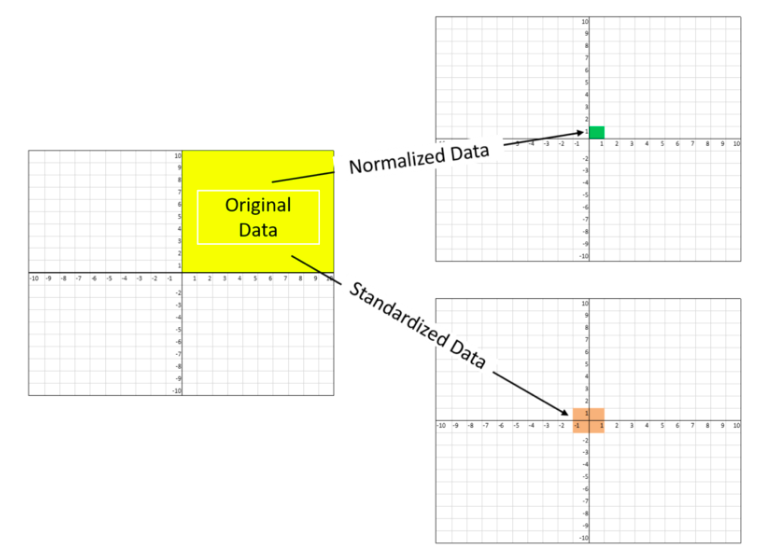

#### Normalizer

Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.

**It is not column based but a row based normalization technique.**

Normalizer rescales each sample. For example,. rescaling each company's stock price independently of the other => Some stocks are more expensive than others. To account for this, we normalize it.

The normalizer scales each **value** by dividing each value by its magnitude in n-dimensional space for n number of features.

$\dfrac{x_i}{\sqrt{x_i^2 + y_i^2 + z_i^2}}$

In [3]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
df_norm = pd.DataFrame(normalizer.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

df, df_norm

(        WEIGHT  PRICE
 Orange      15      1
 Apple       18      3
 Banana      12      2
 Grape       10      5,
           WEIGHT     PRICE
 Orange  0.997785  0.066519
 Apple   0.986394  0.164399
 Banana  0.986394  0.164399
 Grape   0.894427  0.447214)

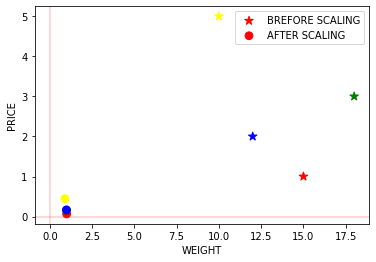

In [4]:
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df_norm.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

#### Standardization

**Assumes data is normally distributed within each feature** and scales them such that the *distribution centered around 0, with a standard deviation of 1*

It will transform the data such that its distribution will have mean value 0 and standard deviation 1 => it's done feature-wise (independently for each feature)

X_new = (X-mean)/std


**Good for objective funcitons that assume that all features are centered arround 0 and have variance in the same order** - RBF kernel of SVM or the L1 na dL2 regularizers of linear models)

Subtracting the mean from the data is called **centering**, whereas dividing by the standard deviation is called **scaling**. As such, the method is sometime called **“center scaling“*.

**If data is not normally distributed, this is not the best scaler to use.**



In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

df, df_std

(        WEIGHT  PRICE
 Orange      15      1
 Apple       18      3
 Banana      12      2
 Grape       10      5,
           WEIGHT     PRICE
 Orange  0.412393 -1.183216
 Apple   1.402136  0.169031
 Banana -0.577350 -0.507093
 Grape  -1.237179  1.521278)

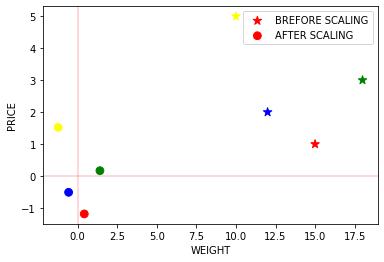

In [6]:
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df_std.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

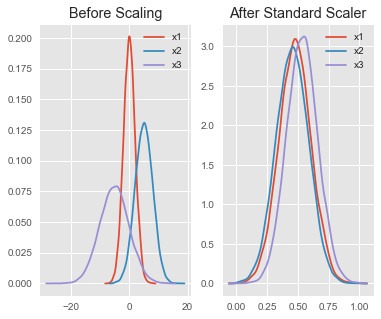

#### Normalization vs Standardization

Normalizer acts row-wise and StandardScaler column-wise

The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.



#### Min Max Scaler

Shrinks the range such that the range is now between **0 and 1 (or -1 to 1 if there are negative values)**:

- When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
- On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
- If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1


**MinMax Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values.**

Also called MinMax Normalizer 

Xi_new = (x_i - min(x)) / (max(x)-min(x))


**This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.**
However, it is sensitive to outliers !!! So if there are outliers in the data, you might want to consider Robust Scaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_min_max = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
df, df_min_max

(        WEIGHT  PRICE
 Orange      15      1
 Apple       18      3
 Banana      12      2
 Grape       10      5,
         WEIGHT  PRICE
 Orange   0.625   0.00
 Apple    1.000   0.50
 Banana   0.250   0.25
 Grape    0.000   1.00)

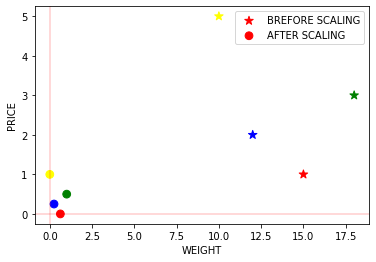

In [8]:
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df_min_max.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

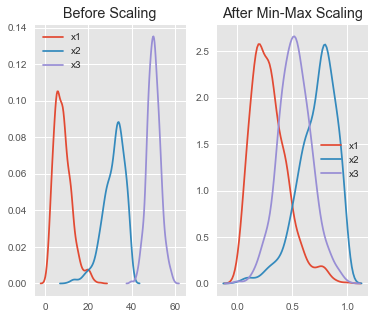

#### Robust Scaler

RobustScaler uses a similar method to the Min-Max scaler but it **instead uses the interquartile range, rather than the min-max, so that it is robust to outliers**

**If our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well.**


xi_new = (xi- Q1(x)) / (Q3(x) - Q1(x))

The centering and scaling statistics of this Scaler are based on percentiles and are therefore not influenced by a few numbers of huge marginal outliers. Note that the outliers themselves are still present in the transformed data

In [9]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()

df_rb = pd.DataFrame(rb_scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
df, df_rb

(        WEIGHT  PRICE
 Orange      15      1
 Apple       18      3
 Banana      12      2
 Grape       10      5,
           WEIGHT     PRICE
 Orange  0.352941 -0.857143
 Apple   1.058824  0.285714
 Banana -0.352941 -0.285714
 Grape  -0.823529  1.428571)

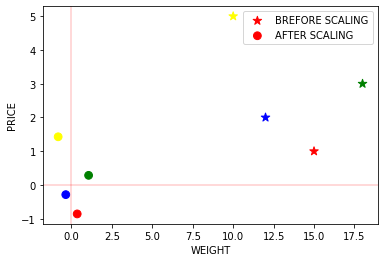

In [10]:
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df_rb.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

Notice that after Robust scaling, the distributions are brought into the same scale and overlap, but the outliers remain outside of bulk of the new distributions.

However, in Min-Max scaling, the two normal distributions are kept seperate by the outliers that are inside the 0-1 range.
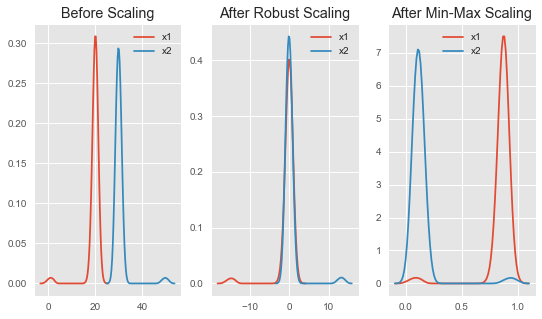